In [95]:
import pandas as pd
from random import shuffle

In [96]:
datafile = "../data/model.xls"

In [97]:
df = pd.read_excel(datafile)

In [98]:
df

,电量趋势下降指标,线损指标,告警类指标,是否窃漏电
0,4,1,1,1
1,4,0,4,1
2,2,1,1,1
3,9,0,0,0
4,3,1,0,0
...,...,...,...,...
286,4,1,2,0
287,1,0,2,0
288,5,1,2,1
289,2,1,0,0


In [99]:
data = df.values

In [100]:
data

array([[4, 1, 1, 1],
       [4, 0, 4, 1],
       [2, 1, 1, 1],
       ...,
       [5, 1, 2, 1],
       [2, 1, 0, 0],
       [4, 1, 0, 0]], dtype=int64)

In [101]:
shuffle(data)

## 二、划分训练集和测试集

In [102]:
p = 0.8
train_num = int(len(data) * p)
train = data[:train_num, :]
test = data[train_num:, :]

In [103]:
train.shape

(232, 4)

## 三、 构建 LM 神经网络模型

In [104]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

In [105]:
netfile = "../tmp/net.model"

### 3.1 构建 3 层神经网络结构

In [49]:
net = Sequential()

net.add(Dense(input_dim=3, units=10))
net.add(Activation('relu'))
net.add(Dense(units=1))
net.add(Activation('sigmoid'))

### 3.2 神经网络的训练

In [106]:
net.compile(loss='binary_crossentropy',
           optimizer='adam',
#             class_mode='binary'# 加上抛异常：ValueError: Session keyword arguments are not support during eager execution. You passed: {'class_mode': 'binary'}
           )
net.fit(train[:, :3], 
        train[:, 3],
       epochs=1000,
       batch_size=1)

Epoch 1/1000
232/232 [==============================] - 1s 2ms/step - loss: 0.2795
Epoch 2/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.2806
Epoch 3/1000
232/232 [==============================] - 0s 997us/step - loss: 0.2751
Epoch 4/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.2747
Epoch 5/1000
232/232 [==============================] - 0s 933us/step - loss: 0.2718
Epoch 6/1000
232/232 [==============================] - 0s 1ms/step - loss: 0.2725
Epoch 7/1000
232/232 [==============================] - 0s 941us/step - loss: 0.2679
Epoch 8/1000
232/232 [==============================] - 0s 963us/step - loss: 0.2705
Epoch 9/1000
232/232 [==============================] - 0s 941us/step - loss: 0.2655
Epoch 10/1000
232/232 [==============================] - 0s 976us/step - loss: 0.2644
Epoch 11/1000
232/232 [==============================] - 0s 903us/step - loss: 0.2637
Epoch 12/1000
232/232 [==============================] - 0s 920us/step 

### 3.3 模型保存

In [107]:
net.save_weights(netfile)

### 3.4 预测

In [108]:
pred_result = net.predict_classes(train[:, :3])

In [109]:
pred_result = pred_result.reshape(train_num)

In [110]:
pred_result

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### 3.5 绘图

In [111]:
# del cm_plot
from cm_plot import cm_plot

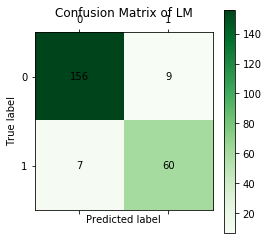

In [112]:
cm_plot(train[:, 3], pred_result, 'Confusion Matrix of LM').show()

### 3.6 精确率 vs 召回率

In [113]:
precision = 68 / (7 + 68)

In [114]:
recall = 68 / (9 + 68)

In [115]:
precision, recall

(0.9066666666666666, 0.8831168831168831)

### 后续为辅助代码

In [26]:
net.compile?

Signature:
net.compile(
    optimizer,
    loss=None,
    metrics=None,
    loss_weights=None,
    sample_weight_mode=None,
    weighted_metrics=None,
    target_tensors=None,
    **kwargs,
)
Docstring:
Configures the model for training.

# Arguments
    optimizer: String (name of optimizer) or optimizer instance.
        See [optimizers](/optimizers).
    loss: String (name of objective function) or objective function or
        `Loss` instance. See [losses](/losses).
        If the model has multiple outputs, you can use a different loss
        on each output by passing a dictionary or a list of losses.
        The loss value that will be minimized by the model
        will then be the sum of all individual losses.
    metrics: List of metrics to be evaluated by the model
        during training and testing. Typically you will use
        `metrics=['accuracy']`. To specify different metrics for different
        outputs of a multi-output model, you could also pass a dictionary,
    

In [130]:
Dense?

Init signature:
Dense(
    units,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs,
)
Docstring:     
Just your regular densely-connected NN layer.

`Dense` implements the operation:
`output = activation(dot(input, kernel) + bias)`
where `activation` is the element-wise activation function
passed as the `activation` argument, `kernel` is a weights matrix
created by the layer, and `bias` is a bias vector created by the layer
(only applicable if `use_bias` is `True`).

Note: if the input to the layer has a rank greater than 2, then
it is flattened prior to the initial dot product with `kernel`.

# Example

```python
    # as first layer in a sequential model:
    model = Sequential()
    model.add(Dense(32, input_shape=(16,)))
    # now the model will take as input arrays of 

In [131]:
train

array([[ 4,  1,  1,  1],
       [ 4,  1,  1,  1],
       [ 2,  1,  1,  1],
       [ 9,  0,  0,  0],
       [ 9,  0,  0,  0],
       [ 4,  1,  1,  1],
       [ 9,  0,  0,  0],
       [ 3,  1,  0,  0],
       [ 3,  0,  0,  0],
       [ 2,  1,  1,  1],
       [ 9,  0,  0,  0],
       [ 4,  1,  1,  1],
       [ 9,  0,  0,  0],
       [ 4,  1,  1,  1],
       [ 5,  0,  2,  1],
       [ 3,  0,  0,  0],
       [ 3,  0,  0,  0],
       [ 2,  1,  1,  1],
       [ 3,  1,  3,  1],
       [ 4,  1,  1,  1],
       [ 4,  0,  2,  0],
       [ 3,  1,  3,  1],
       [ 3,  1,  0,  0],
       [ 3,  1,  0,  0],
       [ 7,  0,  0,  0],
       [ 6,  0,  0,  0],
       [ 7,  0,  0,  0],
       [ 2,  1,  0,  0],
       [ 4,  0,  2,  0],
       [ 8,  1,  4,  1],
       [ 4,  0,  4,  1],
       [ 3,  0,  1,  0],
       [ 2,  1,  0,  0],
       [10,  1,  2,  1],
       [ 5,  1,  1,  1],
       [ 5,  1,  0,  0],
       [ 1,  1,  4,  1],
       [ 7,  0,  0,  0],
       [ 5,  1,  0,  0],
       [ 6,  0,  1,  0],


In [132]:
data

array([[4, 1, 1, 1],
       [4, 1, 1, 1],
       [2, 1, 1, 1],
       ...,
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 0]], dtype=int64)

In [133]:
l = list(range(5))

In [134]:
l

[0, 1, 2, 3, 4]

In [135]:
shuffle(l)

In [136]:
l

[0, 4, 3, 1, 2]

In [137]:
import numpy as np

In [138]:
y = np.array([1 ,1 ,1 ,1 ,1 ,0 ,1 ,0 ,0 ,0 ,1 ,0 ,1 ,1 ,0 ,0 ,0 ,1 ,0 ,0 ,1 ,1 ,0 ,1 ,0 ,1 ,1 ,0 ,1 ,1 ,0 ,1 ,0 ,1 ,0 ,1 ,1
 ,0 ,0 ,0 ,0 ,0 ,1 ,1 ,1 ,0 ,1 ,0 ,0 ,0 ,0 ,1 ,1 ,0 ,0 ,0 ,1 ,0 ,1 ,0 ,0 ,1 ,0 ,1 ,1 ,0 ,1 ,0 ,0 ,0 ,0 ,1 ,1 ,1
 ,1 ,1 ,1 ,1 ,0 ,1 ,0 ,1 ,1 ,0 ,0 ,0 ,1 ,1 ,0 ,1 ,0 ,0 ,1 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,1 ,1 ,0 ,0 ,0 ,0 ,0
 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,1 ,1 ,1 ,1 ,1 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,1 ,0 ,1 ,0 ,0
 ,0 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,1 ,0 ,1 ,1 ,0 ,0
 ,0 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,1 ,0 ,1 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,1 ,1 ,0 ,0 ,1 ,1 ,0 ,0 ,0 ,0 ,0
 ,0 ,0 ,0 ,0 ,1 ,0 ,1 ,0 ,0 ,0])

In [139]:
y_pred = np.array([1 ,1 ,1 ,1 ,1 ,0 ,1 ,0 ,0 ,0 ,1 ,0 ,1 ,1 ,0 ,0 ,0 ,1 ,0 ,0 ,1 ,1 ,0 ,1 ,0 ,1 ,1 ,0 ,1 ,1 ,0 ,1 ,0 ,1 ,0 ,1 ,1
 ,0 ,0 ,0 ,0 ,0 ,1 ,1 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,1 ,0 ,0 ,0 ,1 ,0 ,1 ,0 ,0 ,1 ,0 ,1 ,1 ,0 ,1 ,1 ,0 ,0 ,0 ,1 ,1 ,1
 ,1 ,1 ,1 ,1 ,0 ,1 ,0 ,0 ,1 ,0 ,0 ,0 ,0 ,1 ,0 ,1 ,0 ,0 ,1 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,1 ,1 ,0 ,0 ,0 ,0 ,0
 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,1 ,1 ,1 ,1 ,1 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,1 ,0 ,1 ,0 ,0
 ,0 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0 ,1 ,1 ,0 ,1 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,1 ,0 ,1 ,0 ,0 ,0
 ,0 ,0 ,1 ,0 ,1 ,0 ,0 ,1 ,1 ,0 ,1 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,0 ,1 ,0 ,1 ,1 ,0 ,0 ,0 ,0 ,0
 ,0 ,0 ,0 ,0 ,1 ,0 ,1 ,0 ,0 ,0])

In [140]:
len(y[(y==0) & (y_pred==0)])

144

In [141]:
len(y[(y==1) & (y_pred==0)])

7

In [142]:
len(y[(y==0) & (y_pred==1)])

7

In [143]:
len(y[(y==1) & (y_pred==1)])

74

In [144]:
y_true = train[:, 3]

In [145]:
len(y_true[(y_true==0) & (pred_result==0)]) # TN

149

In [146]:
len(y_true[(y_true==0) & (pred_result==1)]) # FP

8

In [147]:
len(y_true[(y_true==1) & (pred_result==0)]) # FN

13

In [148]:
len(y_true[(y_true==1) & (pred_result==1)]) # TP

62

## 4 CART 决策树模型

In [116]:
import importlib
from sklearn.tree import DecisionTreeClassifier

In [117]:
try:
    del cm_plot
except Exception as e:
    print(e)
finally:
    import cm_plot

In [118]:
treefile = "../tmp/tree.pkl"

In [119]:
tree = DecisionTreeClassifier()

In [120]:
tree.fit(train[:, :3], train[:, 3])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [121]:
from sklearn.externals import joblib

In [122]:
joblib.dump(tree, treefile)

['../tmp/tree.pkl']

In [123]:
y_pred = tree.predict(train[:, :3])

### 4.1 混淆矩阵绘图

<module 'matplotlib.pyplot' from 'd:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

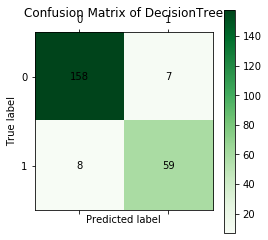

In [124]:
cm_plot.cm_plot(train[:, 3], y_pred, 'Confusion Matrix of DecisionTree')

### 4.2 神经网络 & 决策树模型的 ROC 曲线

In [125]:
from sklearn.metrics import roc_curve

In [126]:
net_prob_result = net.predict_proba(test[:, :3]).reshape(len(test))
dt_prob_result = tree.predict_proba(test[:, :3])[:, 1]

In [127]:
tree.classes_

array([0, 1], dtype=int64)

In [128]:
net.predict_proba?

Signature: net.predict_proba(x, batch_size=32, verbose=0)
Docstring:
Generates class probability predictions for the input samples.

The input samples are processed batch by batch.

# Arguments
    x: input data, as a Numpy array or list of Numpy arrays
        (if the model has multiple inputs).
    batch_size: integer.
    verbose: verbosity mode, 0 or 1.

# Returns
    A Numpy array of probability predictions.
File:      d:\programdata\anaconda3\lib\site-packages\keras\engine\sequential.py
Type:      method


In [89]:
net_prob_result,dt_prob_result

(array([1.1565894e-01, 1.3629377e-02, 1.6020626e-02, 7.1062040e-01,
        5.5608749e-03, 1.6020626e-02, 8.7407231e-03, 9.9435771e-01,
        8.9691085e-01, 2.2828919e-01, 3.6793357e-01, 4.0608484e-01,
        1.6765210e-01, 7.1062040e-01, 1.1030528e-01, 4.0771872e-02,
        4.9236119e-03, 6.5963268e-03, 1.1174935e-01, 1.1565894e-01,
        6.1110854e-03, 3.0906916e-02, 2.4405926e-02, 1.6020626e-02,
        2.7834475e-02, 3.6793357e-01, 2.3370683e-02, 9.9905431e-03,
        8.7407231e-03, 3.6793357e-01, 8.3930761e-01, 6.0923994e-02,
        4.0608484e-01, 4.4067681e-02, 3.0906916e-02, 2.2828919e-01,
        1.1030528e-01, 6.5963268e-03, 9.9905431e-03, 2.3370683e-02,
        3.6453772e-01, 8.4623253e-01, 2.3668647e-02, 1.3629377e-02,
        1.9382378e-01, 1.1565894e-01, 1.1565894e-01, 9.8911619e-01,
        9.4553828e-04, 1.1565894e-01, 2.3668647e-02, 5.5608749e-03,
        1.3629377e-02, 8.7407231e-03, 6.8642443e-01, 4.9236119e-03,
        1.9192612e-03, 1.1565897e-01, 2.3370666e

In [129]:
fpr, tpr, thresholds = roc_curve(test[:, 3], net_prob_result, pos_label=1)
tree_fpr, tree_tpr, tree_shresholds = roc_curve(test[:, 3], dt_prob_result, pos_label=1)

### 4.2.1 fpr
- False positive rate---->fpr = FP / (TN + FP) 
- 物理含义：所有负样本中误报为正样本的概率，可以理解为"误诊率".

In [130]:
fpr

array([0.  , 0.  , 0.  , 0.04, 0.06, 0.1 , 0.18, 0.24, 0.24, 0.32, 0.36,
       0.4 , 0.44, 0.48, 0.5 , 0.54, 0.6 , 0.68, 0.7 , 1.  ])

### 4.2.2 tpr
- True Positve Rate----> tpr = TP / (TP + FN)
- 物理含义：所有正样本被正确预测出来的概率，亦即“召回率”。

In [131]:
tpr 

array([0.        , 0.11111111, 0.55555556, 0.77777778, 0.77777778,
       0.88888889, 0.88888889, 0.88888889, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [132]:
thresholds

array([1.9999704e+00, 9.9997044e-01, 9.1951787e-01, 8.5053468e-01,
       7.2952938e-01, 7.0258594e-01, 5.6111091e-01, 3.7733114e-01,
       3.7733111e-01, 1.4385280e-01, 3.3580363e-03, 1.7234385e-03,
       5.3495169e-05, 3.9935112e-05, 3.3468008e-05, 7.5697899e-06,
       1.1622906e-06, 5.0663948e-07, 8.9406967e-08, 0.0000000e+00],
      dtype=float32)

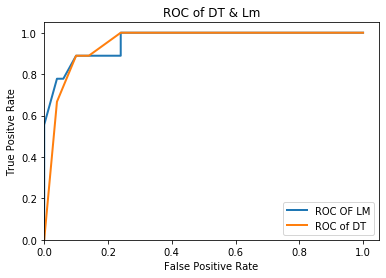

In [133]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, linewidth=2, label='ROC OF LM')
plt.plot(tree_fpr, tree_tpr, linewidth=2, label="ROC of DT")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positve Rate")

plt.ylim(0, 1.05)
plt.xlim(0, 1.05)

plt.title("ROC of DT & Lm")
plt.legend(loc=4)
plt.show()

In [80]:
roc_curve?

Signature:
roc_curve(
    y_true,
    y_score,
    pos_label=None,
    sample_weight=None,
    drop_intermediate=True,
)
Docstring:
Compute Receiver operating characteristic (ROC)

Note: this implementation is restricted to the binary classification task.

Read more in the :ref:`User Guide <roc_metrics>`.

Parameters
----------

y_true : array, shape = [n_samples]
    True binary labels. If labels are not either {-1, 1} or {0, 1}, then
    pos_label should be explicitly given.

y_score : array, shape = [n_samples]
    Target scores, can either be probability estimates of the positive
    class, confidence values, or non-thresholded measure of decisions
    (as returned by "decision_function" on some classifiers).

pos_label : int or str, default=None
    The label of the positive class.
    When ``pos_label=None``, if y_true is in {-1, 1} or {0, 1},
    ``pos_label`` is set to 1, otherwise an error will be raised.

sample_weight : array-like of shape (n_samples,), default=None
    Samp

In [79]:
net.predict?

Signature:
net.predict(
    x,
    batch_size=None,
    verbose=0,
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
)
Docstring:
Generates output predictions for the input samples.

Computation is done in batches.

# Arguments
    x: Input data. It could be:
        - A Numpy array (or array-like), or a list of arrays
          (in case the model has multiple inputs).
        - A dict mapping input names to the corresponding
          array/tensors, if the model has named inputs.
        - A generator or `keras.utils.Sequence` returning
          `(inputs, targets)` or `(inputs, targets, sample weights)`.
        - None (default) if feeding from framework-native
          tensors (e.g. TensorFlow data tensors).
    batch_size: Integer or `None`.
        Number of samples per gradient update.
        If unspecified, `batch_size` will default to 32.
        Do not specify the `batch_size` if your data is in the
        form of symbo